<a href="https://colab.research.google.com/github/joshua-atolagbe/Computational-Social-Science-Training-Program/blob/master/nlp_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

The goal of this project is to analyze the doctors reviews by patient. The dataset contains reviews of doctors given by patients. Download [here](https://www.kaggle.com/datasets/avasaralasaipavan/doctor-review-dataset-has-reviews-on-doctors?resource=download)

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import re
from wordcloud import WordCloud


import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
pd.set_option('display.max_colwidth', 500)


In [3]:
# Importing the dataframe

import pandas as pd
df = pd.read_csv('doctorReviews (2).csv')
print(df.shape)
df.head()

(143, 4)


,Unnamed: 0,reviews,labels,tag
0,93,he explained initially that it takes 4-5 sitings and its total treatment cost is is about 10000 rupees but the total treatment he charged 22250 rupees including medicinesthe estimation of treatment is false,0,negative
1,33,great dr definitely recommend he recommends less medicine and explain everything and provide solutions,1,positive
2,129,doctor came and spent 9 seconds and recommended for nose throat endoscopy & some hearing test it was night 10 and hearing test doctor is not avilable does it make sense? charges for endoscopy is 2400 rs and same doctor is going to perform i request hospital to have some humanity ground and spend some time with the patient atleast 10 mins before remondening tests in the same hospital as per the pictures at the hospital dr spent good amount time in west and europe kindly request inherit some p...,0,negative
3,7,i am completely satisfied with the consultation i have been having acute severe bronchitis and acute laringitis for the last 20 days which i was not aware of i have consulted a doctor from different hospital earlier and i wasn't advised for any test or any x-ray as that doctor didn't gave me a proper treatment i had to consult dr murali i m extremely happy that i came here came to know about what actually had happened to me the dr is so friendly listened to very well and understood what issu...,1,positive
4,38,my experience was nice dr dyed was cool and compose patiently listened to my medication history and gave simple treatment hopefully i should be ok post 3 course of days i will recommend people for his medication,1,positive


From the data above, it looks that the sentiment label has been assigned already, as such there's no need to generate it ourselves. So let's do some EDA.

## EDA

In [4]:
data = df.copy()
data.labels.value_counts()

labels
0    72
1    71
Name: count, dtype: int64

The dataset looks balanced. Which is good for ur analysis. Let's do some visualizations

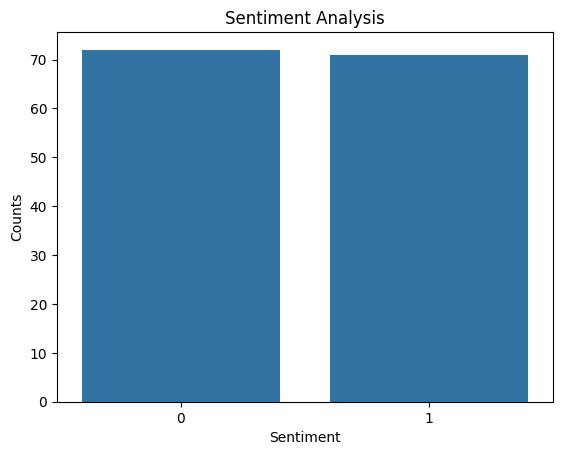

In [5]:
# plot visualization of count

sns.countplot(x='labels', data=data)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

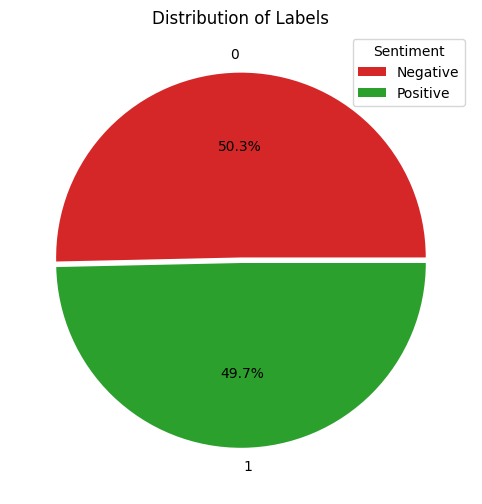

In [6]:
label_counts = data['labels'].value_counts()

# Create the pie chart
plt.figure(figsize=(8,6))
plt.pie(label_counts, colors=['tab:red', 'tab:green'],
        labels=label_counts.index, explode=[0.03, 0], autopct='%1.1f%%')

plt.legend(title='Sentiment', loc='best', labels=['Negative', 'Positive'])
plt.title('Distribution of Labels')

plt.show()

In [7]:
data.sample(10)

,Unnamed: 0,reviews,labels,tag
102,120,for endoscopy they have charged around 4000 and the doctor is not at all courteous or respectful never had such an bad experience in a hospital very unprofessional and extremely high pricing,0,negative
34,116,not in house doctor recommend to be available on emergency,0,negative
10,21,last time my self i was effected with bell’s palsy with the doctor treatment and his concern on his patient was very realistic,1,positive
21,125,they said they don't follow and only accept walk-ins after lot of discussions and irritating at each they confirmed appointment after 20mins of cross examiningpatient was examined remotely without touching highly dissatisfied,0,negative
140,28,very friendly and his approach is also very good clearly explaining the problem and very positive approach i would highly recommend him,1,positive
19,36,i have been consulting dr husaain from last one year he is very experienced doctor and at the same time calm and polite i had sinusitis and post the treatment i never had it it's been almost 6 month's now post the treatment also he helped me with gastric issues and i'm doing pretty well thanks doc,1,positive
58,69,highly efficient and experienced in work the doctors look young but they work beyond your expectations myself hailing from a research background critically evaluate everything and this is the best place and the best team i highly recommend,1,positive
52,58,treatment along with behavior with patient is found initial stage of treatment the test pp blood sugar & fasting both were much more higher than the normal range but after taking the advice and regular & timely having the medicine now the said suger level in the both stages found about to normal,1,positive
135,102,warning! fraud doctor with fake degree has no idea of medicalhe will kill you if you have a chronic illness don't go to him he is a big fraud,0,negative
115,48,i recommend the doctor,1,positive


The data looks to be clean, no upper case, no emojis, but there are numbers and punctuations.

In [8]:
def clean(text):
    #remove punctuations
    clean_text = text.translate(str.maketrans('','',string.punctuation))

    #remove numbers and emojis
    clean_txt = re.sub(r'[0-9]+', '', clean_text)

    return clean_txt

In [9]:
data['reviews'] = df['reviews'].apply(lambda x: clean(x))
data.head()

,Unnamed: 0,reviews,labels,tag
0,93,he explained initially that it takes sitings and its total treatment cost is is about rupees but the total treatment he charged rupees including medicinesthe estimation of treatment is false,0,negative
1,33,great dr definitely recommend he recommends less medicine and explain everything and provide solutions,1,positive
2,129,doctor came and spent seconds and recommended for nose throat endoscopy some hearing test it was night and hearing test doctor is not avilable does it make sense charges for endoscopy is rs and same doctor is going to perform i request hospital to have some humanity ground and spend some time with the patient atleast mins before remondening tests in the same hospital as per the pictures at the hospital dr spent good amount time in west and europe kindly request inherit some portion of g...,0,negative
3,7,i am completely satisfied with the consultation i have been having acute severe bronchitis and acute laringitis for the last days which i was not aware of i have consulted a doctor from different hospital earlier and i wasnt advised for any test or any xray as that doctor didnt gave me a proper treatment i had to consult dr murali i m extremely happy that i came here came to know about what actually had happened to me the dr is so friendly listened to very well and understood what issues i ...,1,positive
4,38,my experience was nice dr dyed was cool and compose patiently listened to my medication history and gave simple treatment hopefully i should be ok post course of days i will recommend people for his medication,1,positive


## Stopword removal and 10 most frequent word

In [10]:
# Concatenate all the words in the "reviews" column
all_words = ' '.join(data['reviews']).split()

# Remove stop words from the concatenated words
all_words_clean = [word for word in all_words if word.lower()\
                    not in set(stopwords.words('english'))]

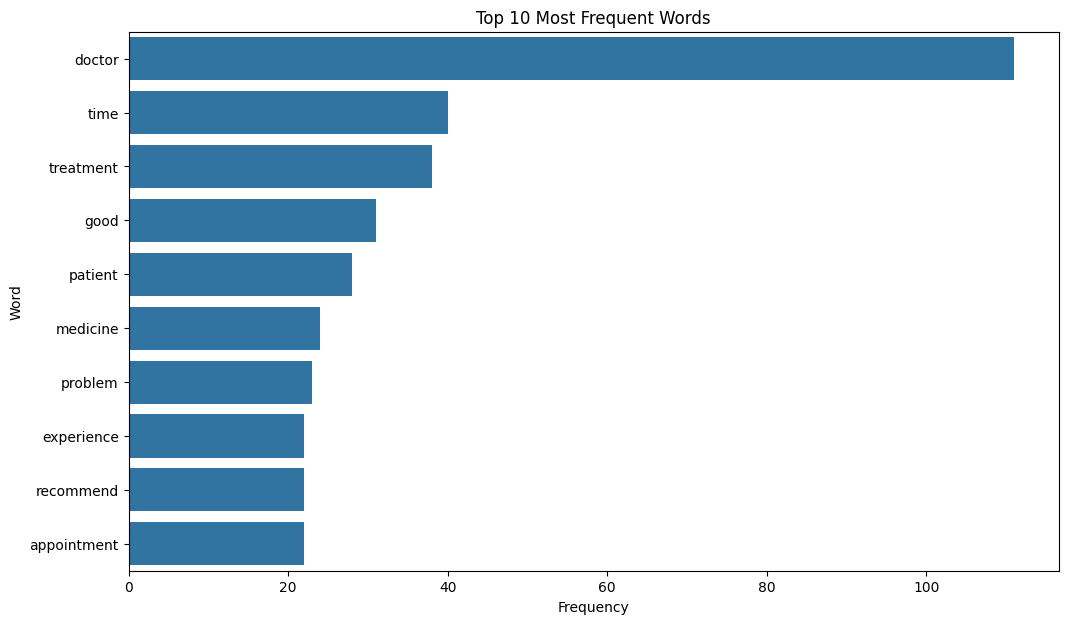

In [11]:
# Bar Chart
word_freq = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(y=word_freq[:10].index, x=word_freq[:10], orient='h')
plt.title('Top 10 Most Frequent Words')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()

## Word Cloud

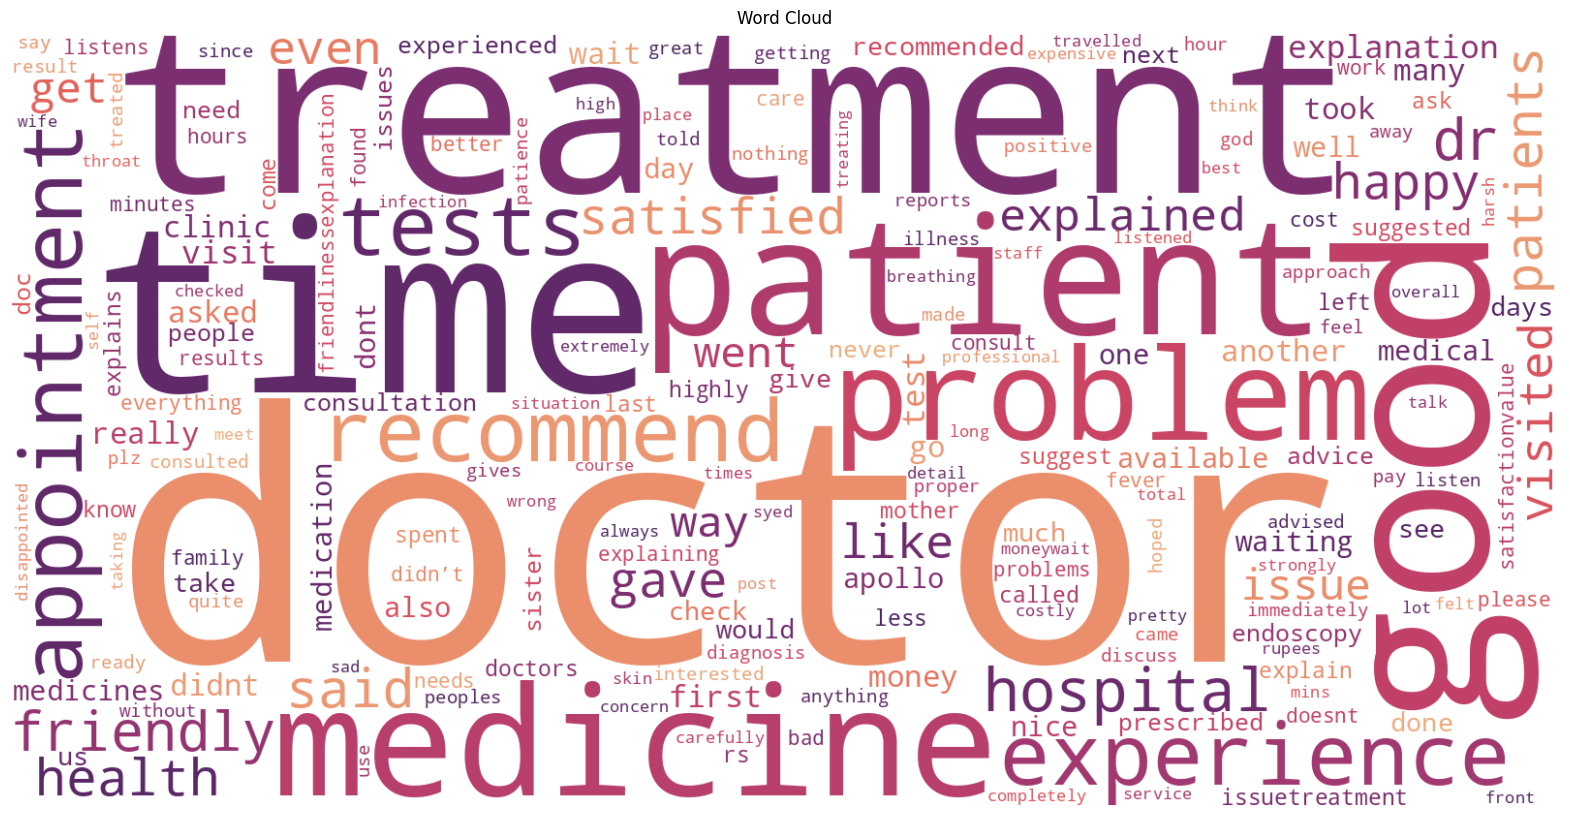

In [12]:
# Word cloud
plt.figure(figsize=(20,20))
plt.title('Word Cloud')
wordcloud = WordCloud(max_words=200, min_font_size=10,
                height=800,width=1600,background_color="white",
                colormap='flare')\
    .generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Lemmatization

In [13]:
def lemma(text):

    txt = [word for word in text.split()]

    #lemmatize the word
    sentence = []
    for word in txt:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [14]:
data['reviews'] = data['reviews'].apply(lambda x: lemma(x))
data.sample(10)

,Unnamed: 0,reviews,labels,tag
11,108,worst doctor they be not at all qualify they be work only for money play with feel of people people think that doctor be like god but they be cheat people and not at all give good treatment to people fake doctor,0,negative
65,57,he be very amicable and responsive i consult when another doctor prescribe me insulin but i wish not to use insulin and hence take sirs advice he then assure me of get my sugar control by oral medication its be years since i m under his treatment,1,positive
108,99,they give me expire medicine after check at home i call them the literally didnt bother i go to the clinic for exchange the medicine the doctor himself give another medicine which be also expire when i ask to refund they say they wont refund when i shout they give the refund,0,negative
118,25,happy with doctor friendlinessexplanation of the health issuetreatment satisfactionvalue for moneywait time dr mithil be an awesome doctori would like to recomend many of my know people to himwe have a very gud experience,1,positive
56,87,look like doctor be busy she talk less with patient and quering about patient history be also low she should have empathy for patient and when leave from doctor patient should feel all hisher concern be address,0,negative
44,24,dr mithil be an awesome doctori would like to recomend many of my know people to himwe have a very gud experience,1,positive
64,23,happy with doctor friendlinessexplanation of the health issuetreatment satisfactionvalue for moneywait time,1,positive
91,111,the doctor be more interest in say no and nothing instead of explain what may be wrong or ok and how to go about manage the symptoms he also do not say anything about the illness or relate issue such as diet or lifestyle unless you specifically ask him,0,negative
115,48,i recommend the doctor,1,positive
2,129,doctor come and spend second and recommend for nose throat endoscopy some hear test it be night and hear test doctor be not avilable do it make sense charge for endoscopy be rs and same doctor be go to perform i request hospital to have some humanity grind and spend some time with the patient atleast mins before remondening test in the same hospital as per the picture at the hospital dr spend good amount time in west and europe kindly request inherit some portion of good from west on recomme...,0,negative


##  Feature extraction (vectorization) for Traditional ML modelling

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vector_data = vectorizer.fit_transform(data['reviews'])
vector_data

<143x992 sparse matrix of type '<class 'numpy.float64'>'
	with 3837 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(vector_data,
                                                    data['labels'],
                                                    test_size=0.3,
                                                    random_state=2024)

In [ ]:
train_x.shape, train_y.shape

((100, 992), (100,))

### 0. Naive Bayes

In [53]:
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             classification_report, roc_curve,
                               roc_auc_score, auc)

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             classification_report, roc_curve,
                               roc_auc_score, auc)


model_naive = MultinomialNB().fit(train_x, train_y)
predicted_naive_ = model_naive.predict_proba(test_x)

predicted_naive = np.where(predicted_naive_[:,1] > 0.5, 1, 0)


In [51]:
def pltMetrics(pred, true, model:str):

    #report
    print(classification_report(true, pred, digits=3))

    #conf matrix
    mat = confusion_matrix(true, pred)
    sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()


              precision    recall  f1-score   support

           0      1.000     0.792     0.884        24
           1      0.792     1.000     0.884        19

    accuracy                          0.884        43
   macro avg      0.896     0.896     0.884        43
weighted avg      0.908     0.884     0.884        43



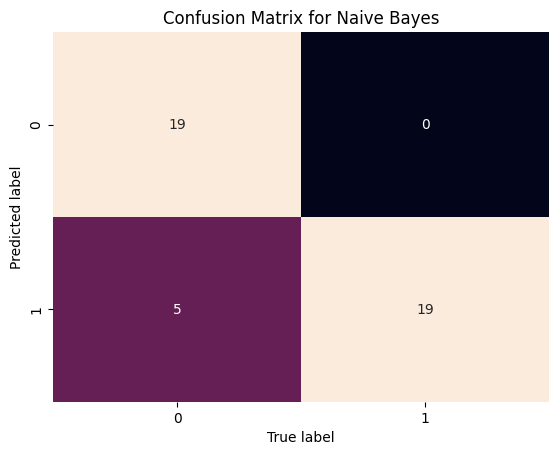

In [ ]:
pltMetrics(predicted_naive, test_y, model='Naive Bayes')

In [50]:
def pltCurve(true, pred, model:str):

    # calculate the fpr and tpr for all thresholds of the classification

    preds = pred#[:, 1]
    fpr, tpr, _ = roc_curve(true, preds)

    roc_auc = auc(fpr, tpr)

    plt.title(f'ROC for {model}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

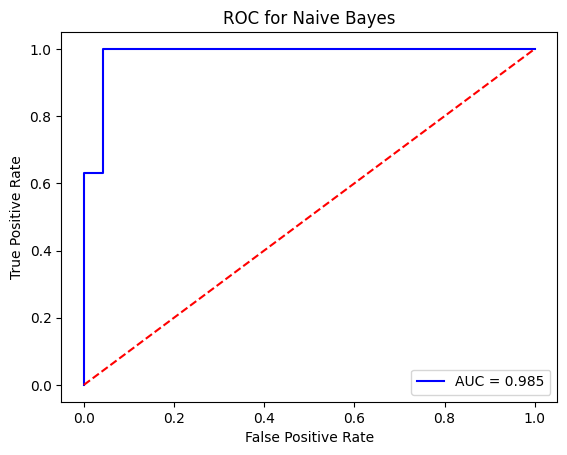

In [ ]:
pltCurve(test_y, predicted_naive_[:, 1], model='Naive Bayes')

### 1. Logistic Regression

              precision    recall  f1-score   support

           0      1.000     0.833     0.909        24
           1      0.826     1.000     0.905        19

    accuracy                          0.907        43
   macro avg      0.913     0.917     0.907        43
weighted avg      0.923     0.907     0.907        43



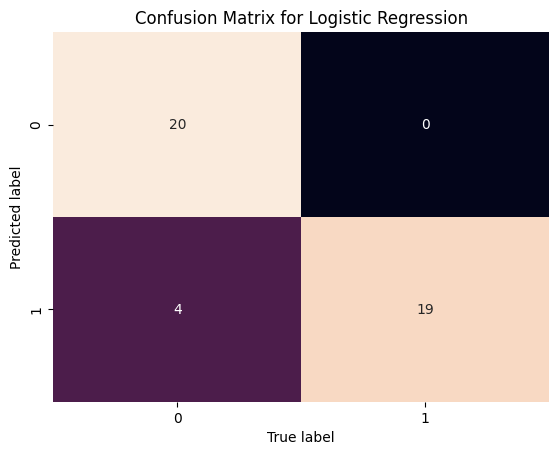

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression().fit(train_x, train_y)
predicted_lr_ = model_lr.predict_proba(test_x)
predicted_lr = np.where(predicted_lr_[:, 1] > 0.5, 1, 0)

pltMetrics(predicted_lr, test_y, model='Logistic Regression')

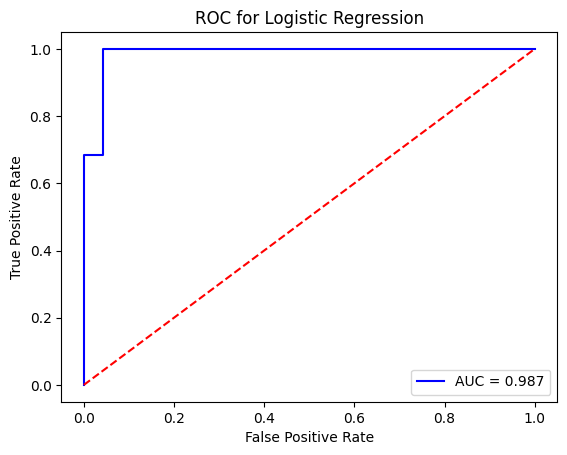

In [ ]:
pltCurve(test_y, predicted_lr_[:, 1], model='Logistic Regression')

We see that the models are performing well on the test data. Now let's see perform sentiment analysis with transformer (Distilbert) and LSTM

## Deep Learning Models

## 0. Transformer

In [ ]:
!pip uninstall -q transformers -y



In [ ]:
!pip install -q transformers==4.17


In [19]:
import tqdm
import time
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel, TFDistilBertForSequenceClassification


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (Input, LSTM, Embedding,
                                        Dense, Dropout, Activation)
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import max_norm

# Fix random seed for reproducibility
seed = 2024
np.random.seed(seed)
tf.random.set_seed(seed)

#### 0.1 Process data to generate ids and masks

In [20]:
train_x, test_x, train_y, test_y = train_test_split(data['reviews'],
                                                    data['labels'],
                                                    test_size=0.3,
                                                    random_state=2024)

In [21]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def bert_features(tokenizer, text, max_seq_length):

    all_ids, all_masks = list(), list()
    for doc in tqdm.tqdm(text):
        tokens = tokenizer.tokenize(doc)
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
        all_ids.append(ids)
        all_masks.append(masks)
    encoded = np.array([all_ids, all_masks])

    return encoded

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [22]:
MAX_SEQ_LENGTH = 128

train_x_ids, train_x_masks = bert_features(tokenizer, train_x.values,
                                        max_seq_length=MAX_SEQ_LENGTH)
test_x_ids, test_x_masks = bert_features(tokenizer, test_x.values,
                                         max_seq_length=MAX_SEQ_LENGTH)

print('Train Features:', train_x_ids.shape, train_x_masks.shape)
print('Val Features:', test_x_ids.shape, test_x_masks.shape)

100%|██████████| 43/43 [00:00<00:00, 191.67it/s]

Train Features: (100, 128) (100, 128)
Val Features: (43, 128) (43, 128)


#### 0.2 Create dataset objects

In [23]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices(((train_x_ids, train_x_masks), train_y.values))
    .shuffle(2024)
    .batch(8)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset
    .from_tensor_slices(((test_x_ids, test_x_masks), test_y.values))
    .batch(8)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

#### 0.3 Build DistilBERT model

In [18]:
# !pip install -q transformers==4.17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 26.1 MB/s eta 0:00:00


In [43]:
tf.random.set_seed(seed)
class distilBERT:

    def __init__(self, tn_ds, tt_ds, epochs:int=3):
        self.tn_ds = tn_ds
        self.tt_ds = tt_ds
        self.e = epochs

    def arc(self):
        id = Input(shape=(MAX_SEQ_LENGTH,),
                       dtype='int32', name='bert_input_ids')
        mask = Input(shape=(MAX_SEQ_LENGTH,),
                         dtype='int32', name='bert_input_masks')
        inputs = [id, mask]

        hidden_state = TFDistilBertModel.from_pretrained('distilbert-base-uncased')(inputs)[0]
        pooled_output = hidden_state[:, 0]

        dense1 = Dense(256, activation='relu')(pooled_output)
        drop1 = Dropout(0.25)(dense1)
        dense2 = Dense(256, activation='relu')(drop1)
        drop2 = Dropout(0.25)(dense2)
        output = Dense(1, activation='sigmoid')(drop2)

        model = Model(inputs=inputs, outputs=output)
        model.layers[2].trainable = False

        model.compile(optimizer='adam',
                    loss='binary_crossentropy', metrics=['accuracy'])

        print(model.summary())
        self.model = model

        return model

    def train(self):

        model = self.arc()

        start = time.time()
        model.fit(self.tn_ds,
            validation_data=self.tt_ds,
            epochs=self.e,
            callbacks=[
                ModelCheckpoint('distilbert.h5',
                                verbose=1,
                                save_best_only=True
                            )
                        ]
                    )
        end = time.time()
        print("Training took {} seconds.".format(end - start))

        self.model_ = model

        return model

    def model_arc(self):
        return plot_model(
                  self.model, to_file='model_arc.png', show_shapes=True, show_dtype=True,
                  show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
                  layer_range=None
              )

    def predict(self, x):
        pred = self.model_.predict(x)#[0]

        return pred


#### 0.4 Train and Evaluate

In [44]:
model_bert = distilBERT(train_ds, test_ds, epochs=10)
model_bert.train()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 bert_input_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_input_masks (InputLay  [(None, 128)]                0         []                            
 er)                                                                                              
                                                                                                  
 tf_distil_bert_model_6 (TF  TFBaseModelOutput(last_hid   6636288   ['bert_input_ids[0][0]',      
 DistilBertModel)            den_state=(None, 128, 768)   0          'bert_input_masks[0][0]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 25s 747ms/step - loss: 0.6479 - accuracy: 0.6200 - val_loss: 0.6244 - val_accuracy: 0.5581
Epoch 2/10
12/13 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.6771
Epoch 2: val_loss improved from 0.62437 to 0.49404, saving model to distilbert.h5
13/13 [==============================] - 4s 287ms/step - loss: 0.5320 - accuracy: 0.6700 - val_loss: 0.4940 - val_accuracy: 0.7907
Epoch 3/10
12/13 [==========================>...] - ETA: 0s - loss: 0.5201 - accuracy: 0.7083
Epoch 3: val_loss did not improve from 0.49404
13/13 [==============================] - 1s 81ms/step - loss: 0.5298 - accuracy: 0.7000 - val_loss: 1.0145 - val_accuracy: 0.4884
Epoch 4/10
12/13 [==========================>...] - ETA: 0s - loss: 0.4141 - accuracy: 0.7917
Epoch 4: val_loss improved from 0.49404 to 0.40969, saving model to distilbert.h5
13/13 [==============================] - 2s 184ms/step - loss: 0.4041 - accuracy: 0.8000 - val_loss: 0.4097 - val_

In [46]:
model_bert.predict(test_ds)

6/6 [==============================] - 4s 54ms/step


array([[9.8681843e-01],
       [4.1169338e-02],
       [9.9400938e-01],
       [9.9980193e-01],
       [2.2214767e-01],
       [9.8511767e-01],
       [7.3196322e-02],
       [2.7662557e-01],
       [9.7325696e-03],
       [5.6658596e-01],
       [9.8999536e-01],
       [4.7123708e-02],
       [9.6364313e-01],
       [2.6086110e-03],
       [2.8691592e-03],
       [8.3894724e-01],
       [7.5744591e-03],
       [4.0734228e-01],
       [8.8272852e-01],
       [3.2101639e-02],
       [5.9158593e-01],
       [7.0724362e-03],
       [7.1993828e-02],
       [8.1895149e-01],
       [9.4077325e-01],
       [4.4275518e-03],
       [1.5749028e-02],
       [5.3499365e-01],
       [2.5786931e-02],
       [5.6948245e-04],
       [9.2041763e-03],
       [8.4289932e-01],
       [9.9944347e-01],
       [9.9904722e-01],
       [9.9820411e-01],
       [1.1151551e-02],
       [7.8904033e-01],
       [1.0448861e-03],
       [9.7510397e-01],
       [9.8588908e-01],
       [9.9586618e-01],
       [9.985528

In [47]:
predicted_bert = model_bert.predict(test_ds)#[0]
predicted_bert = predicted_bert.flatten()
predicted_bert_ = np.where(predicted_bert > 0.5, 1, 0)

6/6 [==============================] - 0s 53ms/step


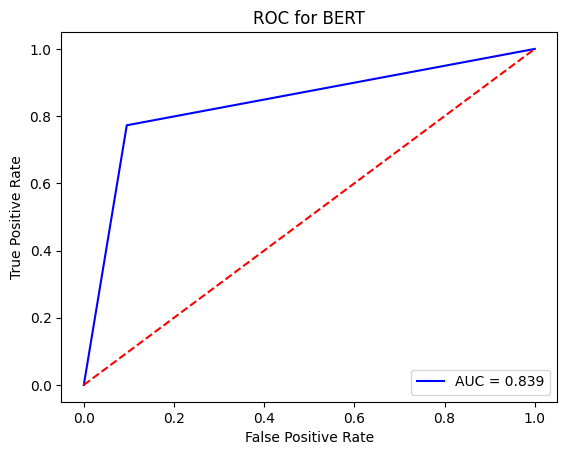

In [58]:
pltCurve(predicted_bert_, test_y, model='BERT')

              precision    recall  f1-score   support

           0      0.905     0.792     0.844        24
           1      0.773     0.895     0.829        19

    accuracy                          0.837        43
   macro avg      0.839     0.843     0.837        43
weighted avg      0.846     0.837     0.838        43



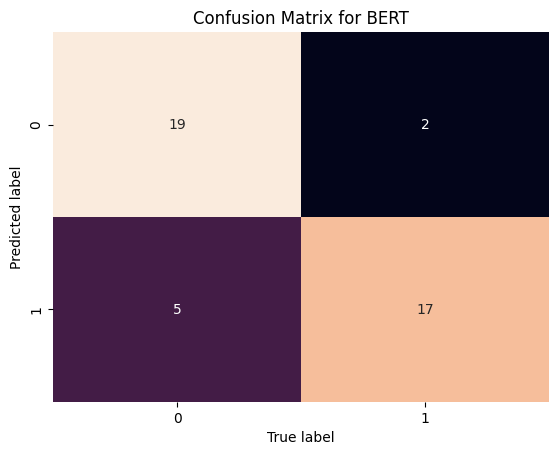

In [57]:
pltMetrics(predicted_bert_, test_y, model='BERT')

## 1. LSTM

#### 1.0 Process data

In [ ]:
max_words = 100
max_len = 50

def padTokenize(tn_x, tt_x):
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(tn_x.astype('str'))

    train_seq = tokenizer.texts_to_sequences(tn_x.astype('str'))
    train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post')

    test_seq = tokenizer.texts_to_sequences(tt_x.astype('str'))
    test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post')

    return train_pad, test_pad

In [ ]:
train_pad, test_pad = padTokenize(train_x, test_x)

#### 1.1 Build model

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

class lstmRNN:
    def __init__(self, tn_pad, tt_pad,
                 tn_y, tt_y, epochs):
        self.train_pad = tn_pad
        self.test_pad = tt_pad
        self.train_y = tn_y
        self.test_y = tt_y
        self.e = epochs

    def arc(self):
        inputs = Input(name='inputs', shape=[max_len])
        layer = Embedding(max_words, 10, input_length=max_len)(inputs)
        layer = LSTM(64)(layer)
        layer = Dense(256, name='FC1')(layer)
        layer = Activation('relu')(layer)
        layer = Dropout(0.5)(layer)
        layer = Dense(1,name='out_layer')(layer)
        layer = Activation('sigmoid')(layer)
        model = Model(inputs=inputs, outputs=layer)

        model.compile(optimizer='adam',
                    loss='binary_crossentropy', metrics=METRICS)

        print(model.summary())

        self.model = model

        return model

    def train(self):

        model = self.arc()
        model.fit(self.train_pad, self.train_y, epochs=self.e,
                    validation_data=(self.test_pad, self.test_y),
                    callbacks=[ModelCheckpoint('lstm.h5',
                                                verbose=1,
                                                save_best_only=True
                                                )])
        self.model_ = model
        return model

    def predict(self, x):

        return self.model_.predict(x)

#### 1.2 Train and evaluate

In [ ]:
model_lstm = lstmRNN(train_pad, test_pad,
                     train_y, test_y, epochs=30)

model_lstm.train()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 50, 10)            1000      
                                                                 
 lstm_3 (LSTM)               (None, 64)                19200     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5500 - precision: 0.5412 - recall: 0.8846
Epoch 2: val_loss did not improve from 0.69305
4/4 [==============================] - 1s 184ms/step - loss: 0.6924 - accuracy: 0.5500 - precision: 0.5412 - recall: 0.8846 - val_loss: 0.6941 - val_accuracy: 0.4884 - val_precision: 0.4571 - val_recall: 0.8421
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5900 - precision: 0.5591 - recall: 1.0000
Epoch 3: val_loss did not improve from 0.69305
4/4 [==============================] - 1s 152ms/step - loss: 0.6903 - accuracy: 0.5900 - precision: 0.5591 - recall: 1.0000 - val_loss: 0.6945 - val_accuracy: 0.5116 - val_precision: 0.4706 - val_recall: 0.8421
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5800 - precision: 0.5581 - recall: 0.9231
Epoch 4: val_loss did not improve from 0.69305
4/4 [==============================] - 0s 109ms/step - loss: 

In [ ]:
predicted_lstm = model_lstm.predict(test_pad)
predicted_lstm_ = predicted_lstm.flatten()
predicted_lstm = np.where(predicted_lstm_ > 0.5, 1, 0)


2/2 [==============================] - 0s 13ms/step


              precision    recall  f1-score   support

           0      0.783     0.750     0.766        24
           1      0.700     0.737     0.718        19

    accuracy                          0.744        43
   macro avg      0.741     0.743     0.742        43
weighted avg      0.746     0.744     0.745        43



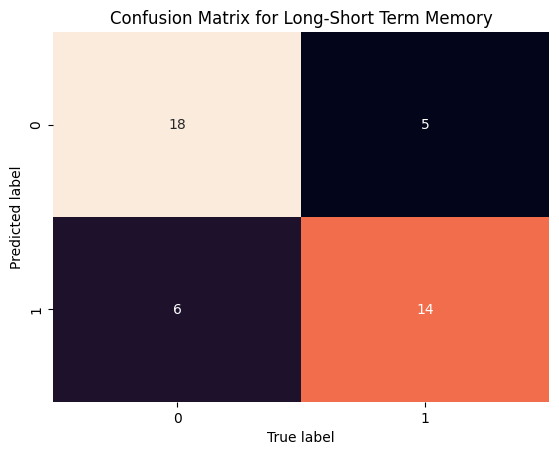

In [ ]:
pltMetrics(predicted_lstm, test_y, model='Long-Short Term Memory')

In [ ]:
predicted_lstm[0]

1

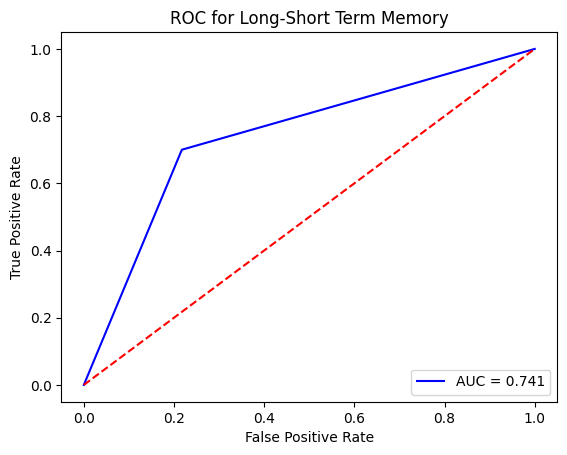

In [ ]:
pltCurve(predicted_lstm, test_y, model='Long-Short Term Memory')